<a href="https://colab.research.google.com/github/dhruvthanki/CISC642/blob/main/PR3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torchvision.transforms as transforms
import cv2
import numpy as np
import torch
import torchvision
import argparse
from PIL import Image
from google.colab.patches import cv2_imshow
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
def get_labels(image, model, device):
    # transform the image to tensor and load into computation device
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image)
    return outputs

In [ ]:
def draw_map(outputs):
    labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
    red_map = np.zeros_like(labels).astype(np.uint8)
    green_map = np.zeros_like(labels).astype(np.uint8)
    blue_map = np.zeros_like(labels).astype(np.uint8)
    
    for label_num in range(0, len(label_map)):
        index = labels == label_num
        red_map[index] = np.array(label_map)[label_num, 0]
        green_map[index] = np.array(label_map)[label_num, 1]
        blue_map[index] = np.array(label_map)[label_num, 2]
        
    segmented_image = np.stack([red_map, green_map, blue_map], axis=2)
    return segmented_image

In [ ]:
def overlay(image, segmented_image):
    alpha = 0.6 # how much transparency to apply
    beta = 1 - alpha # alpha + beta should equal 1
    gamma = 0 # scalar added to each sum
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    cv2.addWeighted(segmented_image, alpha, image, beta, gamma, image)
    return image

In [ ]:
label_map = [
               (0, 0, 0),  # background
               (128, 0, 0), # aeroplane
               (0, 128, 0), # bicycle
               (128, 128, 0), # bird
               (0, 0, 128), # boat
               (128, 0, 128), # bottle
               (0, 128, 128), # bus 
               (128, 128, 128), # car
               (64, 0, 0), # cat
               (192, 0, 0), # chair
               (64, 128, 0), # cow
               (192, 128, 0), # dining table
               (64, 0, 128), # dog
               (192, 0, 128), # horse
               (64, 128, 128), # motorbike
               (192, 128, 128), # person
               (0, 64, 0), # potted plant
               (128, 64, 0), # sheep
               (0, 192, 0), # sofa
               (128, 192, 0), # train
               (0, 64, 128) # tv/monitor
]

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
%%capture
# download or load the model from disk
model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
# set computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model to eval() model and load onto computation devicce
model.eval().to(device)

In [ ]:
# read the image
image = Image.open('/content/drive/MyDrive/UD/Courses/CV/PR3/input/input/street2.jpg')
# do forward pass and get the output dictionary
outputs = get_labels(image, model, device)
# get the data from the `out` key
outputs = outputs['out']
segmented_image = draw_map(outputs)

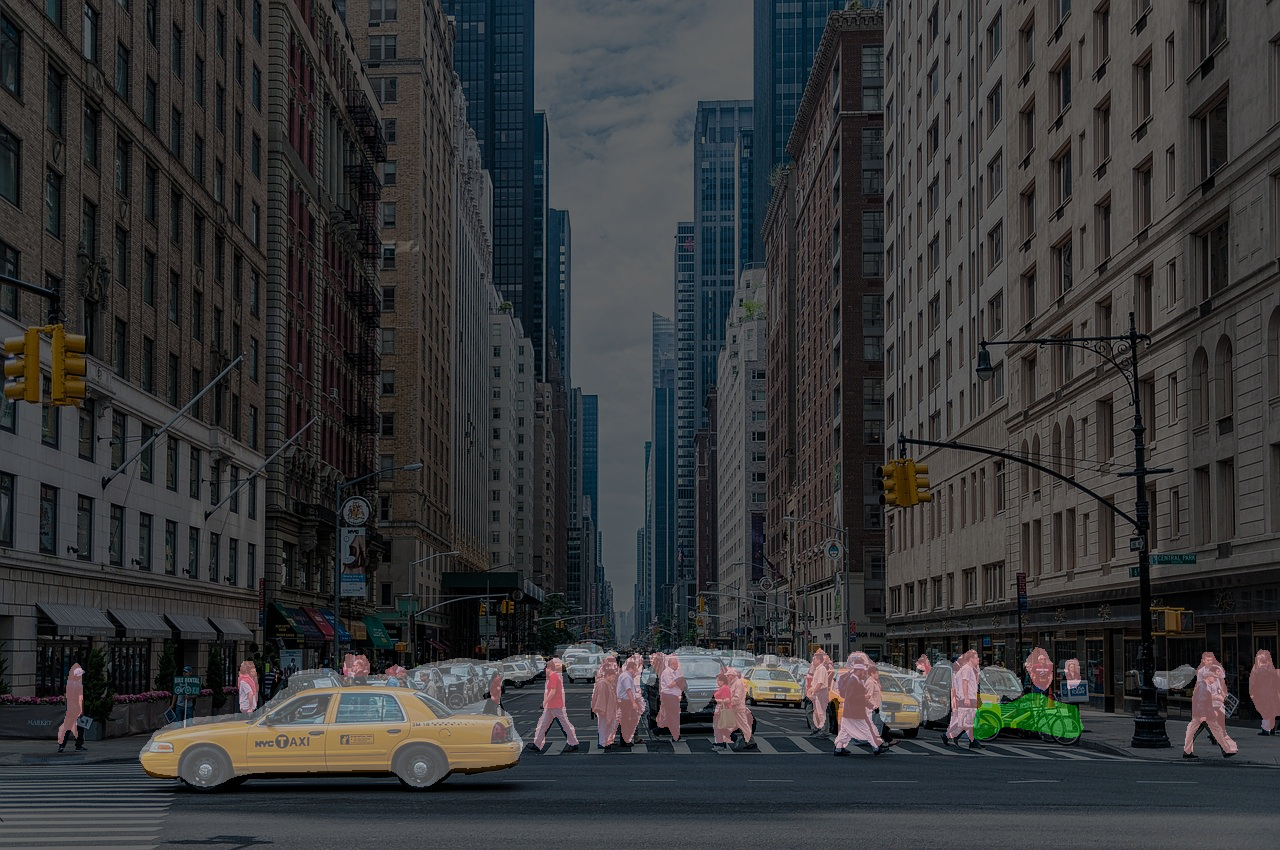

False

In [ ]:
final_image = overlay(image, segmented_image)
# show the segmented image and save to disk
cv2_imshow(final_image)
#cv2_imshow('Segmented image', final_image)
#cv2.waitKey(0)
cv2.imwrite("outputs/segmented_Image.jpg", final_image)

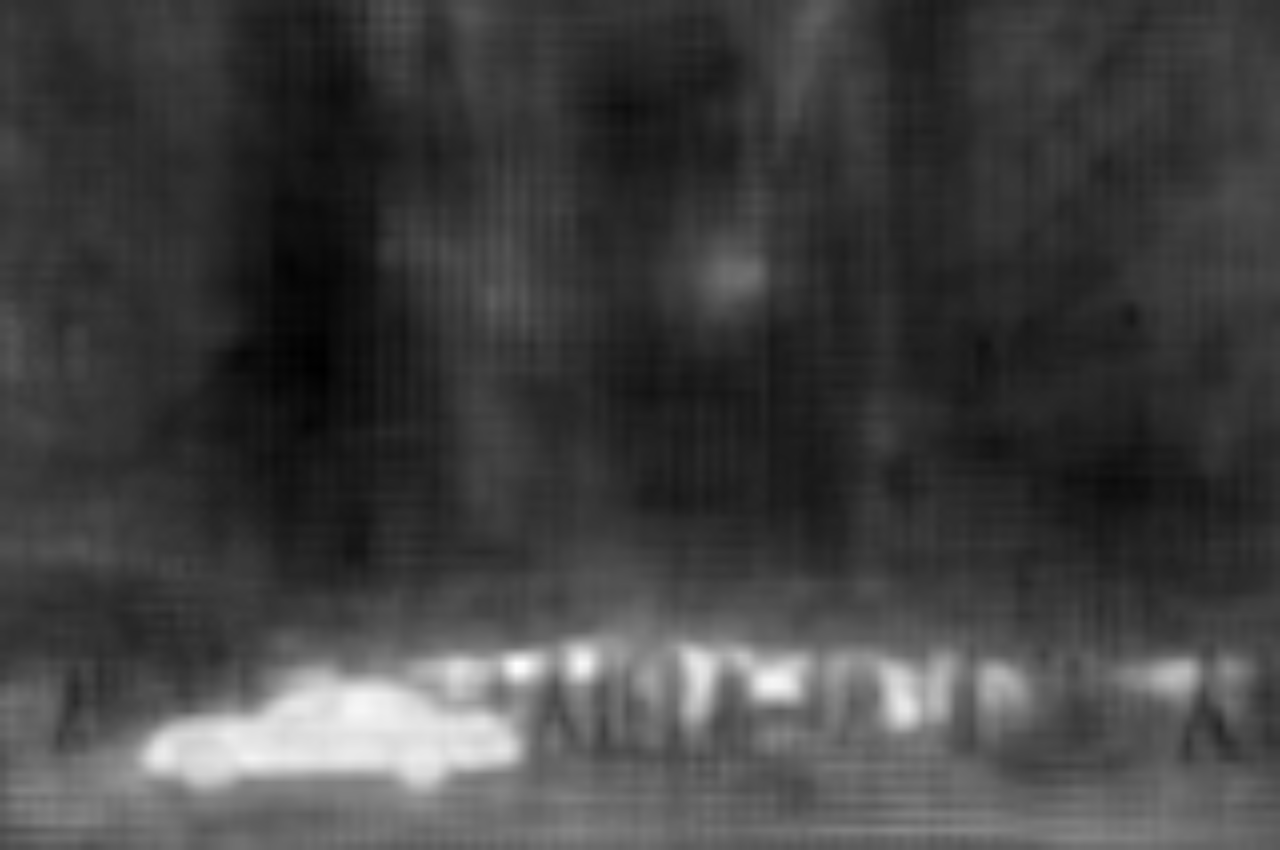

In [ ]:
q = 7
outputs1 = outputs.detach().cpu().numpy()
output2 = ((outputs1[0][q]-np.min(outputs1[0][q])))
output3 = (output2/np.max(output2))*255
cv2_imshow(output3.astype(np.uint8))

(1, 21, 850, 1280)


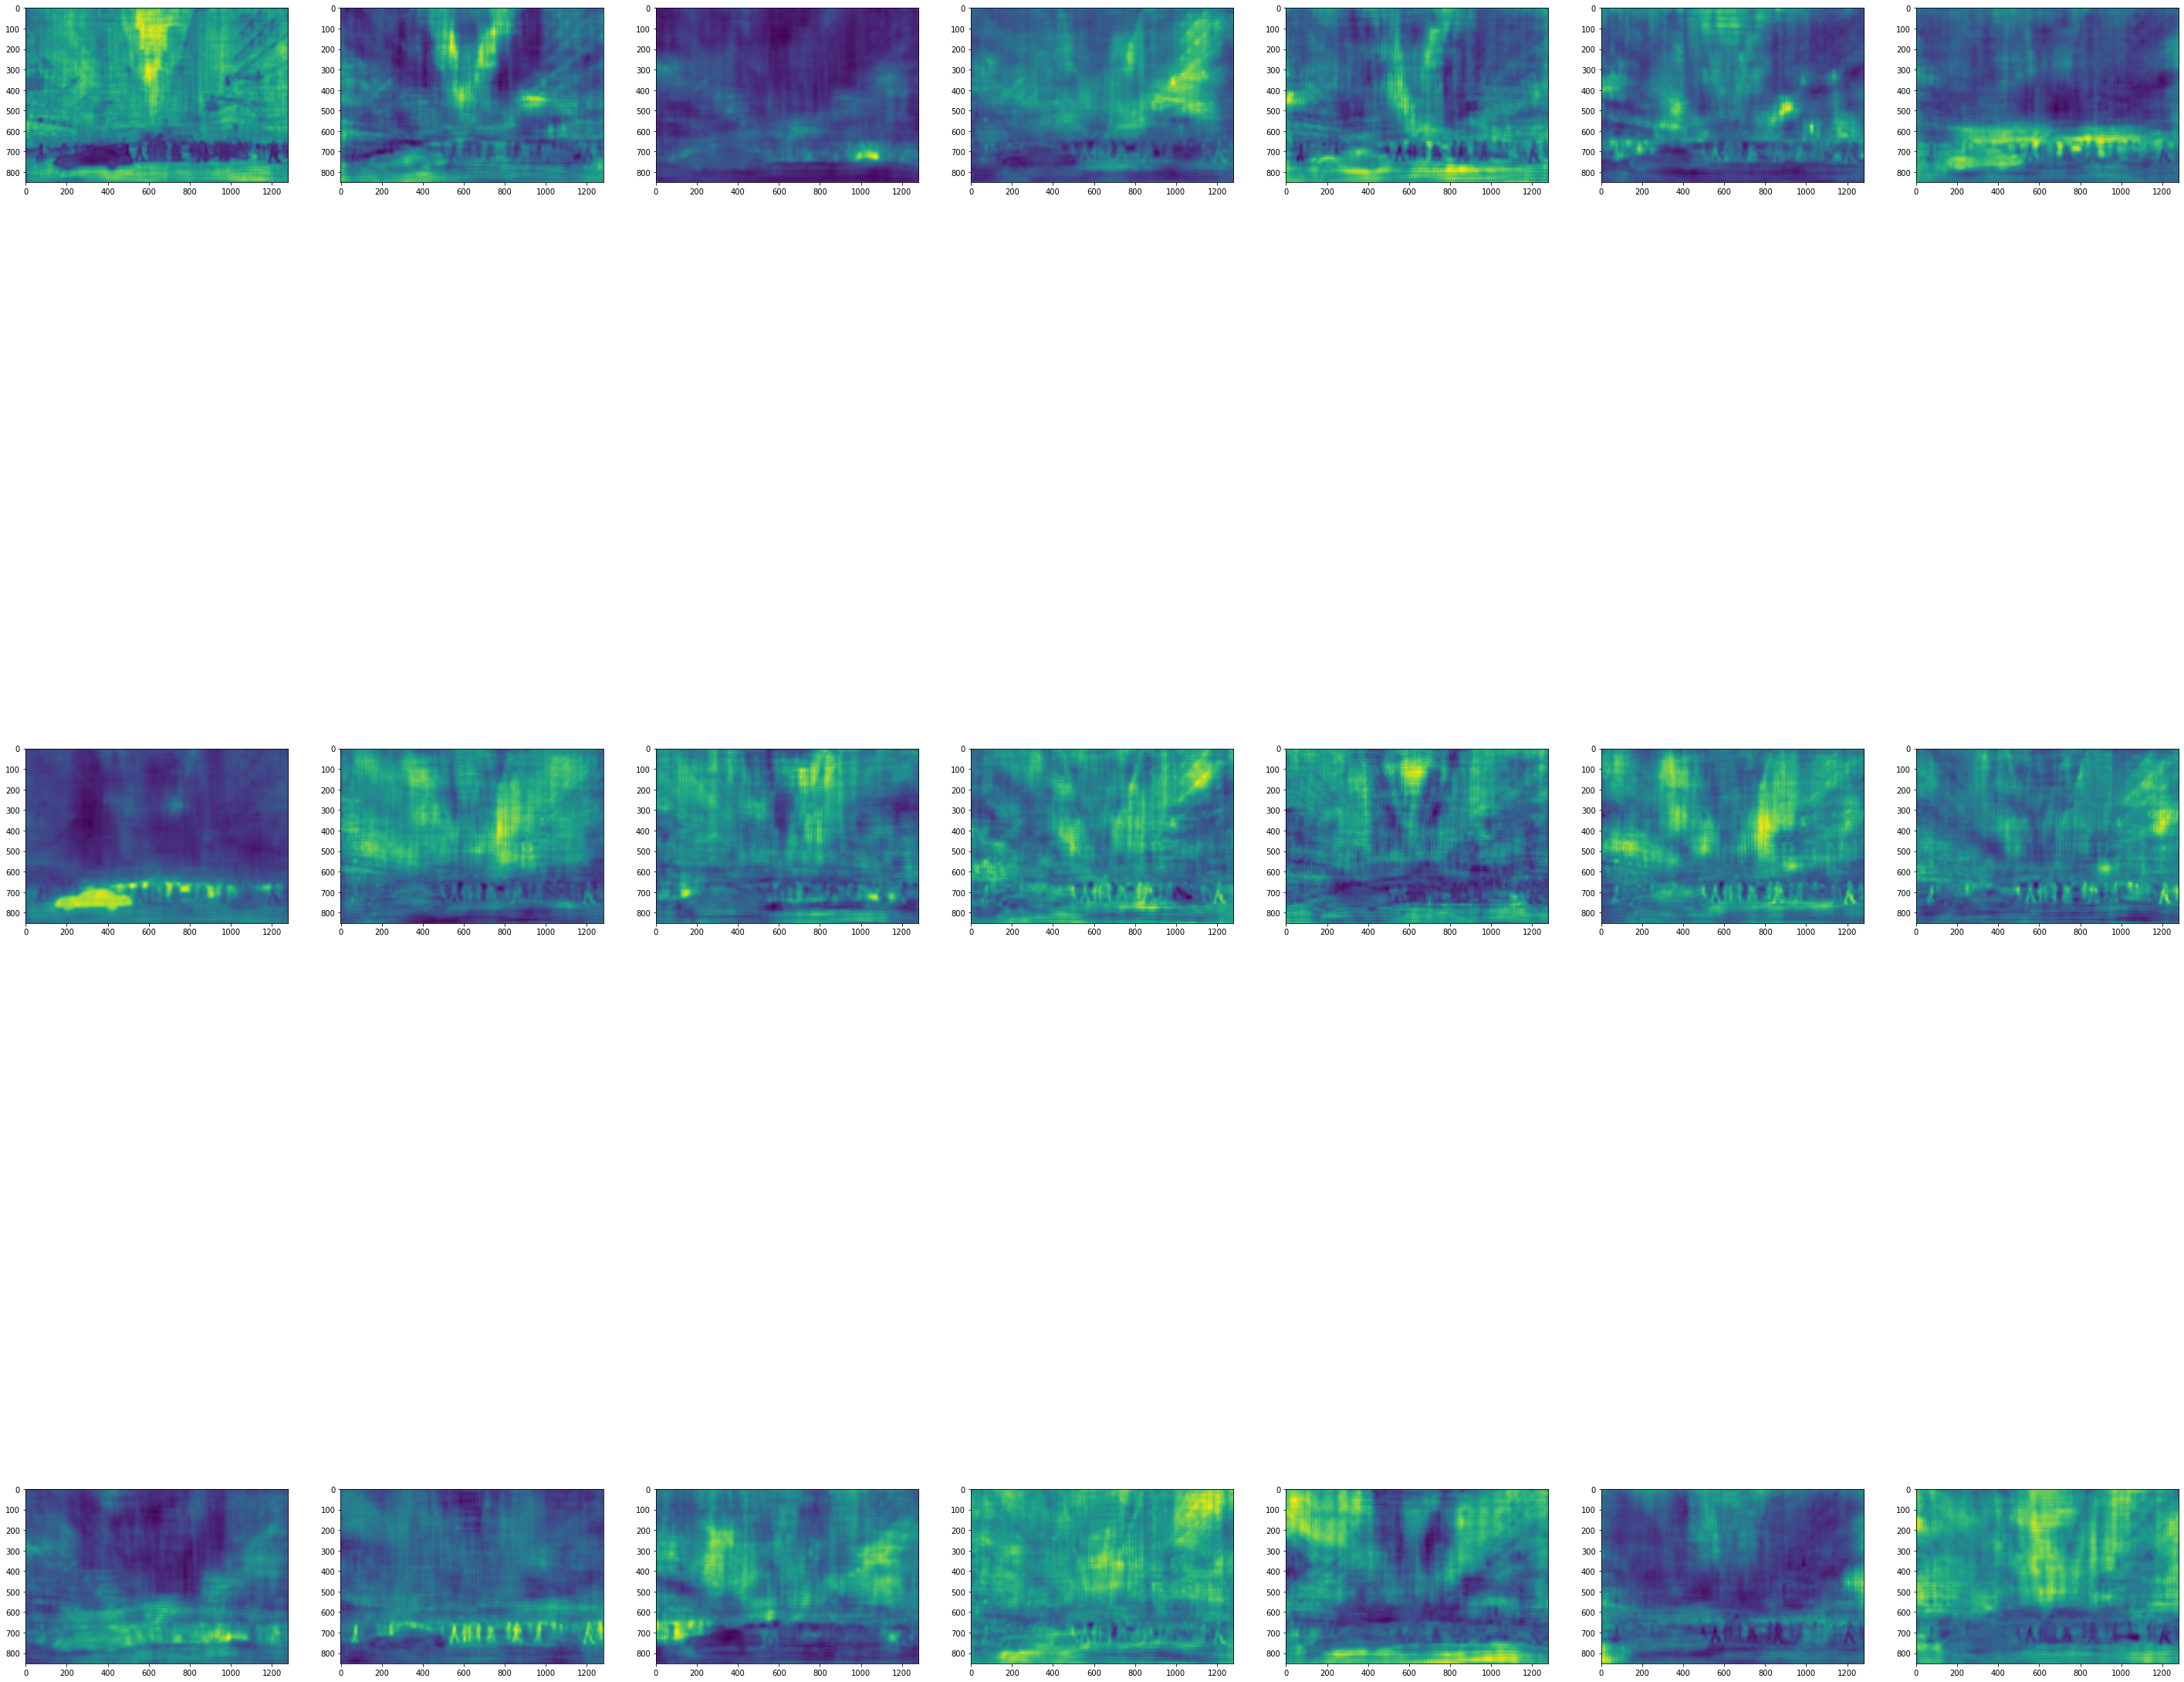

In [ ]:
print(outputs1.shape)
outputs1 = outputs.detach().cpu().numpy()
fig=plt.figure(figsize=(50, 50))
columns = 7
rows = 3
for i in range(0, columns*rows):
    output2 = ((outputs1[0][i]-np.min(outputs1[0][i])))
    output3 = (output2/np.max(output2))*255
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(output3)
plt.show()